In [ ]:
!pip install torch

In [ ]:
!pip install jupyter
!pip install tensorflow 

  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.2
    Uninstalling numpy-1.21.2:
      Successfully uninstalled numpy-1.21.2


In [ ]:
!pip install numpy --upgrade

In [ ]:
import os
import numpy as np
import cv2
import random
import seaborn as sns
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Dropout, add, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
os.listdir(r'C:\Users\user\Downloads\Les')

['.ipynb_checkpoints',
 'annotations_prepped_test',
 'annotations_prepped_train',
 'images_prepped_test',
 'images_prepped_train',
 'LesCV_Project_Final_2_Acc42%.ipynb',
 'LesCV_Project_Final_3_.ipynb',
 'LesCV_Project_Final_3_Acc67%-Copy1.ipynb',
 'LesCV_Project_Final_3_Acc67%-Copy2.ipynb',
 'LesCV_Project_Final_3_Acc67%.ipynb',
 'LesCV_project_try_3.ipynb',
 'LesCV_Week_2.ipynb',
 'snapshots',
 'Untitled.ipynb',
 'vegetable dataset',
 'VGG_Implementation.ipynb',
 '[Project_Final_].ipynb']

# Train Data Path

In [ ]:
img_path = "./images_prepped_train/"
annot_path = "./annotations_prepped_train/"
list_img = np.sort(next(os.walk(img_path), (None, None, []))[2])
list_annot = np.sort(next(os.walk(annot_path), (None, None, []))[2])  
len(list_img), len(list_annot)

(367, 367)

In [ ]:
list_img[2], list_annot[2]

('0001TP_006750.png', '0001TP_006750.png')

# Test Data Path

In [ ]:
img_test_path = "./images_prepped_test/"
annot_test_path = "./annotations_prepped_test/"
list_img_test = np.sort(next(os.walk(img_test_path), (None, None, []))[2])
list_annot_test = np.sort(next(os.walk(annot_test_path), (None, None, []))[2])  
len(list_img_test), len(list_annot_test)

(101, 101)

# Load Train Data

In [ ]:
# All train image
for list_img in os.listdir(img_path):
    imgg = cv2.imread(os.path.join(img_path, list_img), 0)
imgg.shape

(360, 480)

In [ ]:
# ======= RESHAPE IMAGES TRAIN DATA==========
images = []
for list_img in os.listdir(img_path):
    img = cv2.imread(os.path.join(img_path, list_img), 0)
    if img is not None:
#         img = cv2.resize(img, (720, 720))
        img = cv2.resize(img, (256, 256))
        images.append(img)
        
        
images = np.array(images)
images.shape

(367, 256, 256)

In [ ]:
images.shape

(367, 256, 256)

In [ ]:
# All train annotation
for list_annot in os.listdir(annot_path):
    all_msk = cv2.imread(os.path.join(annot_path, list_annot), 0)
all_msk.shape

(360, 480)

In [ ]:
# ======= RESHAPE ANNOTATION TRAIN DATA ==========
seg_masks = []

for list_annot in os.listdir(annot_path):
    msk = cv2.imread(os.path.join(annot_path, list_annot), 0)
    if msk is not None:
        msk = cv2.resize(msk, (256, 256))
        seg_masks.append(msk)
        
seg_masks = np.array(seg_masks)
seg_masks.shape

(367, 256, 256)

# Load Test Data

In [ ]:
# ======= RESHAPE IMAGES TEST DATA ==========

test_images = []

for list_img_test in os.listdir(img_test_path):
    img_test = cv2.imread(os.path.join(img_test_path, list_img_test), 0)
    if img_test is not None:
        img_test = cv2.resize(img_test, (256, 256))
        test_images.append(img_test)
        
test_images = np.array(test_images)
test_images.shape

(101, 256, 256)

In [ ]:
test_images.shape

(101, 256, 256)

In [ ]:
# ======= RESHAPE ANNOTATION TEST DATA ==========

test_label_images = []

for list_annot_test in os.listdir(annot_test_path):
    msk_test = cv2.imread(os.path.join(annot_test_path, list_annot_test), 0)
    if msk_test is not None:
        msk_test = cv2.resize(msk_test, (256, 256))
        test_label_images.append(msk_test)
        
test_label_images = np.array(test_label_images)
test_label_images.shape

(101, 256, 256)

In [ ]:
np.unique(test_label_images)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=uint8)

# Data Preparation

In [ ]:
# --- Reshape train data ---
images = images.reshape(-1, 256, 256, 1)
images.shape

(367, 256, 256, 1)

In [ ]:
seg_masks = seg_masks.reshape(-1, 256, 256, 1)
seg_masks.shape

(367, 256, 256, 1)

In [ ]:
# --- Reshape test data ---
test_images = test_images.reshape(-1, 256, 256, 1)
test_images.shape

(101, 256, 256, 1)

In [ ]:
test_label_images = test_label_images.reshape(-1, 256, 256, 1)
test_label_images.shape

(101, 256, 256, 1)

In [ ]:
print(np.unique(test_label_images))

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [ ]:
# TRAIN TEST SPLIT

x_train, x_val, y_train, y_val = train_test_split(images, seg_masks, test_size = 0.15)

In [ ]:
x_test = test_images

In [ ]:
y_train.shape

(311, 256, 256, 1)

In [ ]:
y_val.shape

(56, 256, 256, 1)

In [ ]:
# ENCODE LABEL DATA

seg_masks_ = to_categorical(y_train, num_classes = 12, dtype ="uint8")
y_val_ = to_categorical(y_val, num_classes = 12, dtype ="uint8")
y_test_ = to_categorical(test_label_images, num_classes = 12, dtype ="uint8")

In [ ]:
np.unique(seg_masks_)

array([0, 1], dtype=uint8)

In [ ]:
seg_masks_.shape

(311, 256, 256, 12)

In [ ]:
y_test_.shape

(101, 256, 256, 12)

# Build Model and Training

In [ ]:
def UNet(n_classes=12, height=256, width=256, channel=1):

    inputs = Input((height, width, channel))
    
    # Contracting path -> Downsampling
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    # Middle
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    # Expansive path -> Upsampling
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    return model

In [ ]:
model = UNet(n_classes=12, height=256, width=256, channel=1)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        dropout[0][0]                    
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
seg_masks_.shape

(311, 256, 256, 12)

In [ ]:
seg_masks_.shape

(311, 256, 256, 12)

In [ ]:
y_val_.shape

(56, 256, 256, 12)

In [ ]:
x_train.shape

(311, 256, 256, 1)

In [ ]:
history = model.fit(x_train, seg_masks_, validation_data = (x_val, y_val_), epochs=100, batch_size = 7)

Epoch 1/100
45/45 [==============================] - 145s 3s/step - loss: 19.0487 - accuracy: 0.0945 - val_loss: 2.5286 - val_accuracy: 0.2122
Epoch 2/100
45/45 [==============================] - 132s 3s/step - loss: 2.6649 - accuracy: 0.2311 - val_loss: 2.4188 - val_accuracy: 0.3184
Epoch 3/100
45/45 [==============================] - 130s 3s/step - loss: 2.4403 - accuracy: 0.2899 - val_loss: 2.3826 - val_accuracy: 0.3194
Epoch 4/100
45/45 [==============================] - 132s 3s/step - loss: 2.3840 - accuracy: 0.3022 - val_loss: 2.3479 - val_accuracy: 0.3196
Epoch 5/100
45/45 [==============================] - 137s 3s/step - loss: 2.3408 - accuracy: 0.3078 - val_loss: 2.3158 - val_accuracy: 0.3199
Epoch 6/100
45/45 [==============================] - 146s 3s/step - loss: 2.3040 - accuracy: 0.3102 - val_loss: 2.2853 - val_accuracy: 0.3202
Epoch 7/100
45/45 [==============================] - 155s 3s/step - loss: 2.2707 - accuracy: 0.3098 - val_loss: 2.2561 - val_accuracy: 0.3208
Epoch

# Training Evaluation

In [ ]:
# Check the shape once again
print(x_val.shape)
print(y_val.shape)
print(x_train.shape)
print(seg_masks_.shape)
print(x_test.shape)
print(y_test_.shape)

(56, 256, 256, 1)
(56, 256, 256, 1)
(311, 256, 256, 1)
(311, 256, 256, 12)
(101, 256, 256, 1)
(101, 256, 256, 12)


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

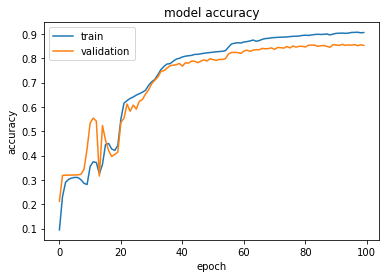

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

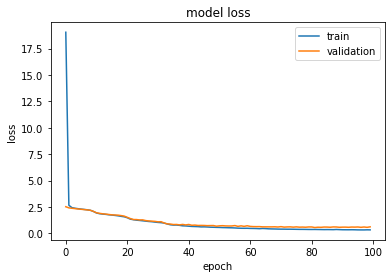

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Testing and Evaluate

In [ ]:
history = model.evaluate(x_test, y_test_, batch_size = 20)

6/6 [==============================] - 20s 845ms/step - loss: 0.6642 - accuracy: 0.8477


In [ ]:
print(f'Test loss: {history[0]} | Test accuracy: {history[1]}')

Test loss: 0.6642166972160339 | Test accuracy: 0.8477094173431396


In [ ]:
prediction = model.predict(x_test)

In [ ]:
classes = np.argmax(prediction, axis = 1)
print(classes)

[[[181  33 181 ...   0 255   0]
  [183  43 181 ...   0 255 255]
  [  0  44 183 ...   0 255   0]
  ...
  [107 154 113 ... 145 138 136]
  [107 157 110 ... 141 129 135]
  [109 153  90 ... 140 128 136]]

 [[185  96 179 ... 184 185   0]
  [185  96 185 ... 184 255 255]
  [189  98 185 ... 189 255 255]
  ...
  [165 149 118 ... 159 164 128]
  [125 149 123 ... 164 164 130]
  [127 149 118 ... 156 164 124]]

 [[  0 148   0 ... 164 189   0]
  [  0 148 173 ... 164 189 189]
  [  0  98 189 ... 190 190 189]
  ...
  [158 141 130 ... 153 155 155]
  [113 141 130 ... 155 158 155]
  [112 141 116 ... 155 159 156]]

 ...

 [[169  53 169 ... 167 196 167]
  [169  31 169 ... 167 194 194]
  [169  28 169 ...  98 196 196]
  ...
  [156 142 150 ... 136 136 113]
  [151 141 151 ... 135 139 113]
  [184   0 101 ... 135 139 114]]

 [[165  53 123 ... 169 195 195]
  [165  53 165 ... 193 193 193]
  [163  48 163 ... 193 193 193]
  ...
  [142 140 141 ... 136 136 120]
  [142 115 142 ... 123 137 122]
  [142 118  91 ... 124 131 1

In [ ]:
def give_color_to_seg_img(seg, n_classes):
    
    if len(seg.shape) == 3:
        seg = seg[:, :, 0]
    seg_img = np.zeros((seg.shape[0], seg.shape[1], 3)).astype('float')
    colors = sns.color_palette("hls", n_classes)
    
    for c in range(n_classes):
        segc = (seg == c)
        seg_img[:, :, 0] += (segc * (colors[c][0]))
        seg_img[:, :, 1] += (segc * (colors[c][1]))
        seg_img[:, :, 2] += (segc * (colors[c][2]))

    return(seg_img)

# Predict on Validation Data

In [ ]:
y_pred = model.predict(x_val)
y_predi = np.argmax(y_pred, axis=3)
y_testi = np.argmax(y_val_, axis=3)
print(y_testi.shape,y_predi.shape)

(56, 256, 256) (56, 256, 256)


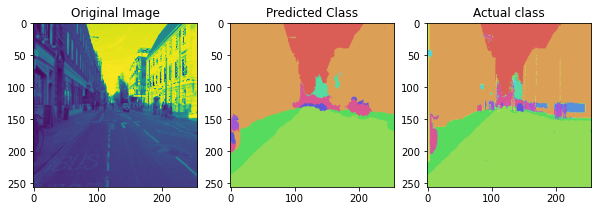

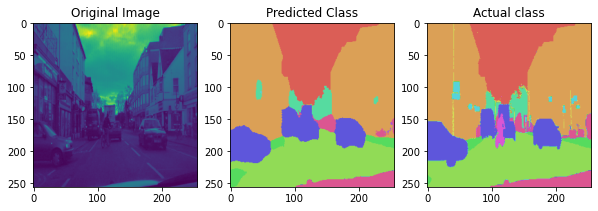

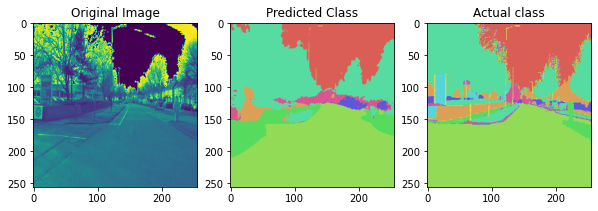

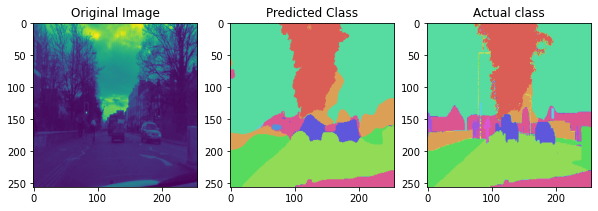

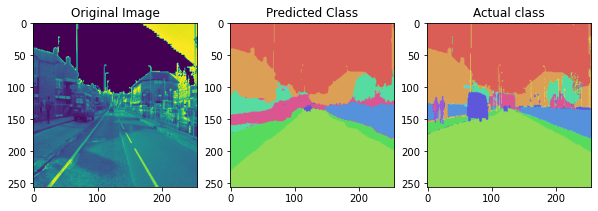

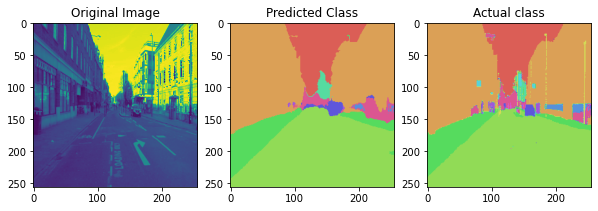

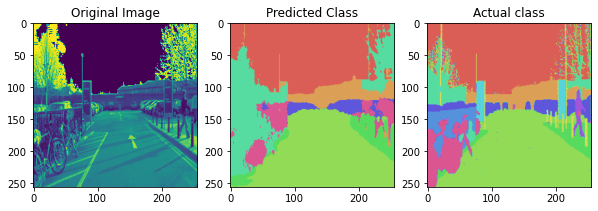

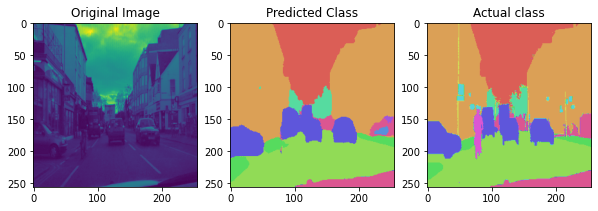

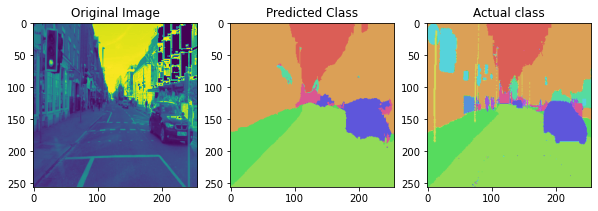

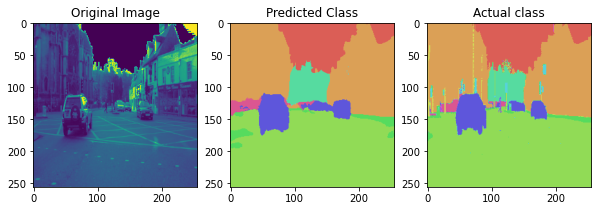

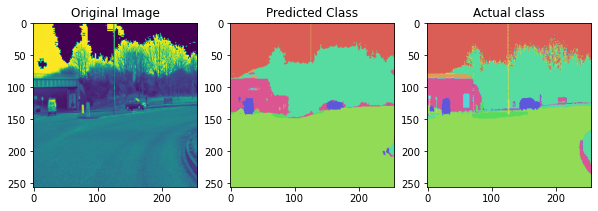

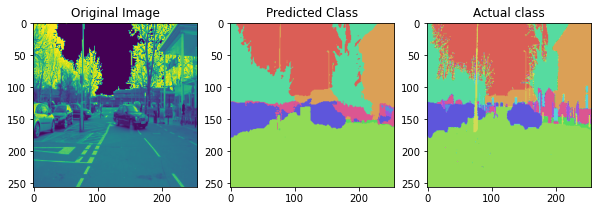

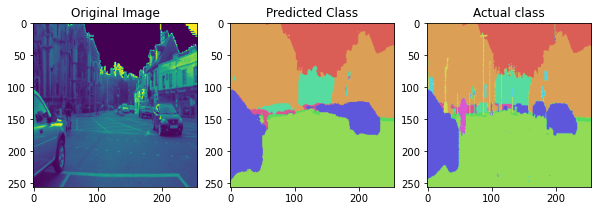

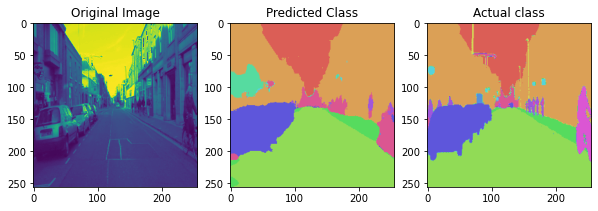

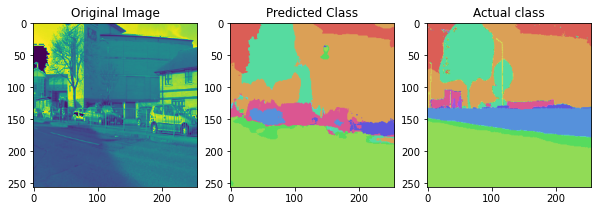

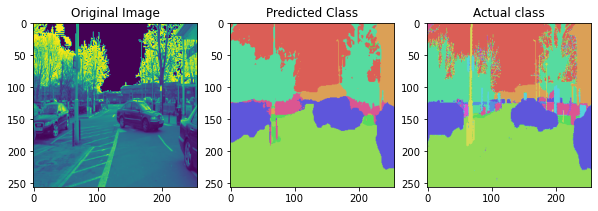

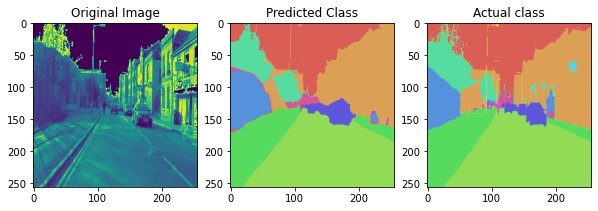

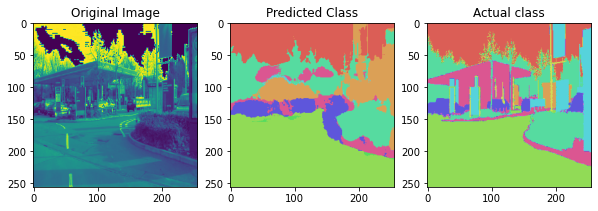

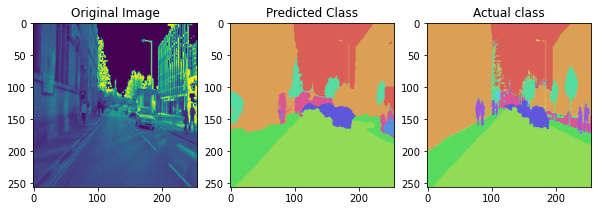

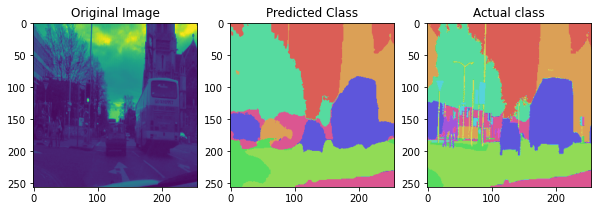

In [ ]:
shape = (256, 256)
n_classes= 12

for i in range(20):
    img_is  = (x_val[i] + 1) * (255.0 / 2)
    seg = y_predi[i]
    segtest = y_testi[i]

    fig = plt.figure(figsize = (10, 30))    
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(img_is / 255.0)
    ax.set_title("Original Image")

    ax = fig.add_subplot(1,3,2)
    ax.imshow(give_color_to_seg_img(seg, n_classes))
    ax.set_title("Predicted Class")
    
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(give_color_to_seg_img(segtest, n_classes))
    ax.set_title("Actual class")
    
    plt.show()

# Predict on Test Data

In [ ]:
y_pred = model.predict(x_test)
y_predi = np.argmax(y_pred, axis=3)
y_testi = np.argmax(y_test_, axis=3)
print(y_testi.shape,y_predi.shape)

(101, 256, 256) (101, 256, 256)


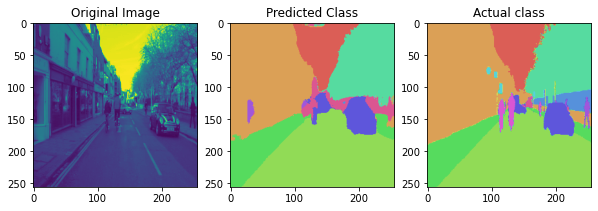

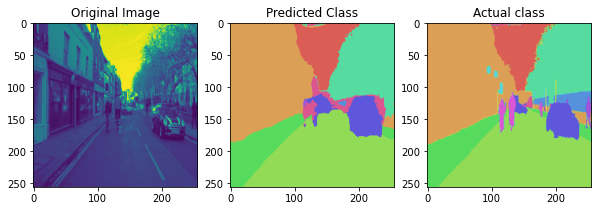

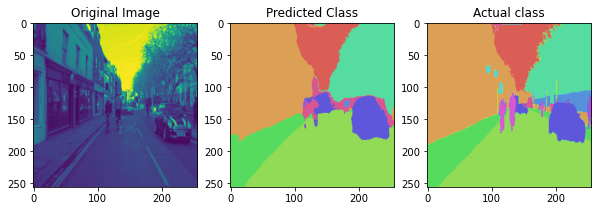

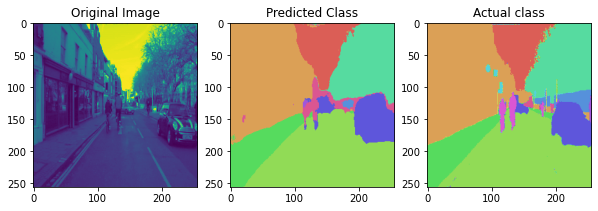

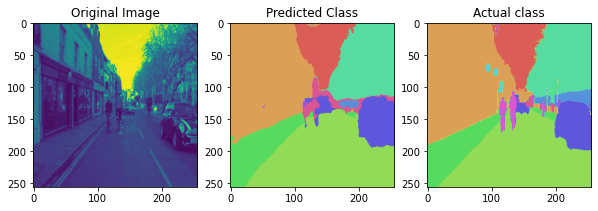

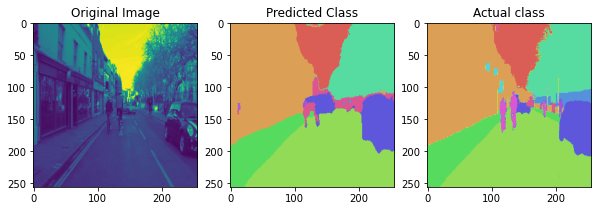

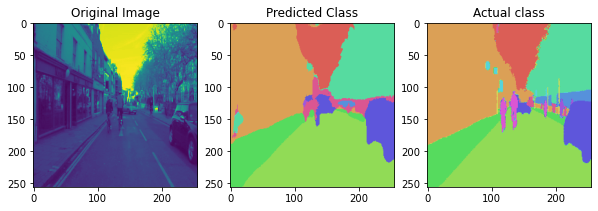

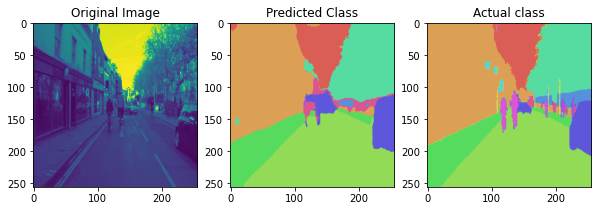

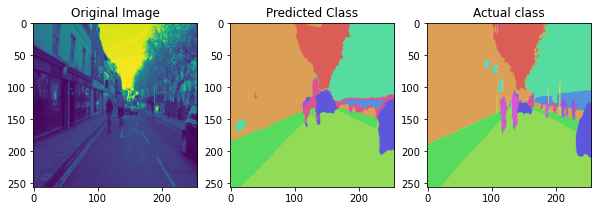

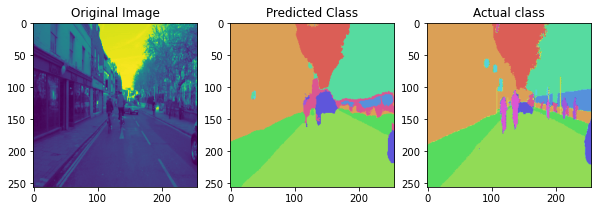

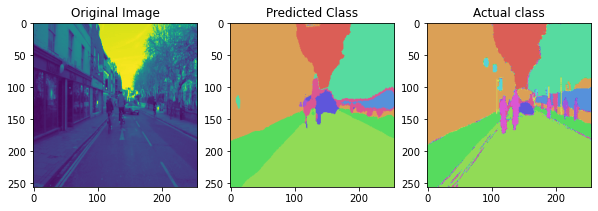

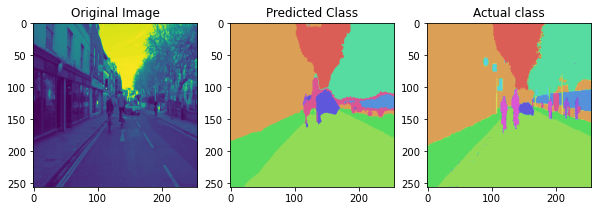

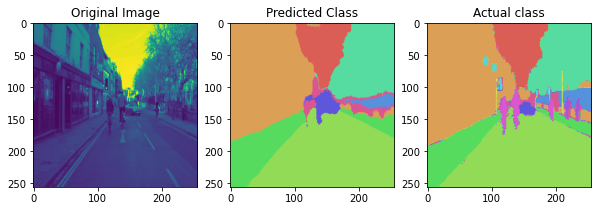

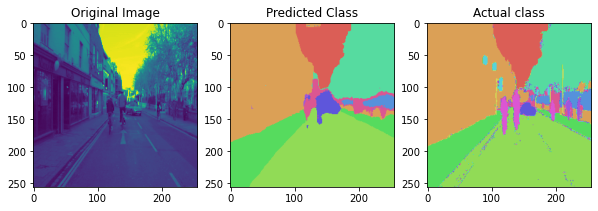

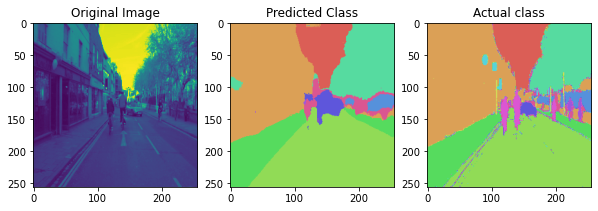

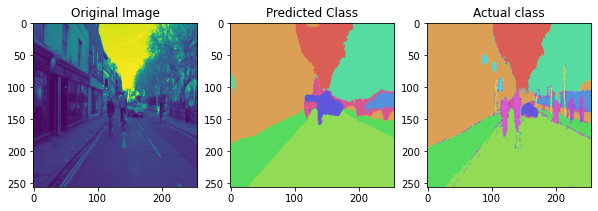

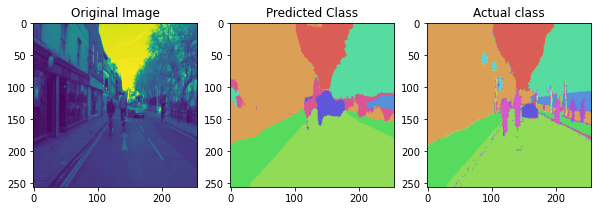

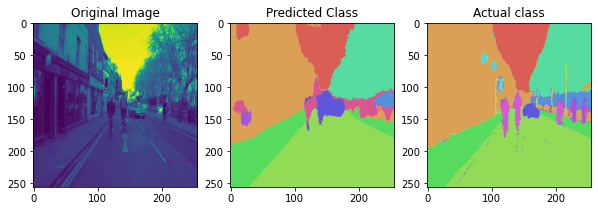

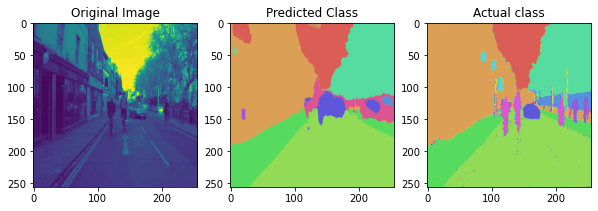

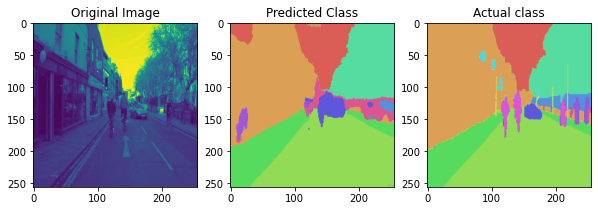

In [ ]:
shape = (256, 256)
n_classes= 12

for i in range(20):
    img_is  = (x_test[i] + 1) * (255.0 / 2)
    seg = y_predi[i]
    segtest = y_testi[i]

    fig = plt.figure(figsize = (10, 30))    
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(img_is / 255.0)
    ax.set_title("Original Image")

    ax = fig.add_subplot(1,3,2)
    ax.imshow(give_color_to_seg_img(seg, n_classes))
    ax.set_title("Predicted Class")
    
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(give_color_to_seg_img(segtest, n_classes))
    ax.set_title("Actual class")
    
    plt.show()

In [ ]:
# --- IOU Metric ---

In [ ]:
def IoU_coeff(y_true, y_pred):
    axes = (1,2) 
    intersection = np.sum(np.abs(y_pred * y_true), axis=axes) 
    mask = np.sum(np.abs(y_true), axis=axes) + np.sum(np.abs(y_pred), axis=axes)
    union = mask - intersection
    smooth = .001
    iou = (intersection + smooth) / (union + smooth)
    return iou

In [ ]:
iou = IoU_coeff(y_testi, y_predi)
intersection = np.sum(np.logical_and(y_testi, y_predi))
union = np.sum(np.logical_or(y_testi, y_predi))
iou = np.mean((intersection)/union)
print(iou)

0.9893719875390932
